In [101]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Pedro Araujo Cordeiro Viana
## Matrícula: 202067452

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [102]:
#Código das funções utilizadas.

def rect(t):
    #função rect(t)
    return np.where(np.abs(t) > 0.5, 0, np.where(np.abs(t) == 0.5, 0.5, 1))


def x_t(t):
    #Sinal x(t) = 8 * rect(t)
    return 8 * rect(t)

def sample_signal(x_t, T, f_s, resolution):
    N = int(T * f_s)  # Número de pontos de amostragem
    t = np.linspace(-T/2, T/2, N, endpoint=False)  # Vetor de tempo amostrado
    x_samples = x_t(t)  # Amostras do sinal x(t)
    return t, x_samples

def H1(sinal, f_c, f_s):
    #Filtro passa baixas
    fft_sinal = np.fft.fft(sinal)
    f = np.fft.fftfreq(len(sinal), d=1/f_s)
    y = np.fft.ifft(fft_sinal * (np.abs(f) <= f_c)).real
    return y, fft_sinal, f

def passa_faixa(sinal, f_c1, f_c2, f_s):
    #Filtro passa faixa
    fft_sinal = np.fft.fft(sinal)
    f = np.fft.fftfreq(len(sinal), d=1/f_s)
    filtro = (np.abs(f) >= f_c1) & (np.abs(f) <= f_c2)
    y = np.fft.ifft(fft_sinal * filtro).real
    return y, fft_sinal, f

def decode_signal(signal, fs, duration):
    #Função para decodificar sinal
    n_samples = int(fs * duration) #Define o número de amostras por segundo (8192)
    decoded_number = []
    
    for i in range(0, len(signal), n_samples): #Analisa as frequências para cada segundo do sinal
        segment = signal[i:i+n_samples]
        fft_segment = np.abs(fft(segment)) #Faz a FFT do segmento analisado
        freqs = np.fft.fftfreq(n_samples, 1/fs) #Extrai as frequências
        
        # Filtrar frequências positivas
        pos_freqs = freqs[:n_samples//2]
        pos_fft_segment = fft_segment[:n_samples//2]

        # Identificar as frequências dominantes
        dominant_freqs = pos_freqs[np.argsort(pos_fft_segment)[-2:]] #guarda os dois valores de frequência relativos as maiores magnitudes

        
        # Encontrar a menor frequência (coluna) e a maior (linha) 
        row_freq = min(dominant_freqs)
        col_freq = max(dominant_freqs)
        
        key = key_map.get((int(round(row_freq)), int(round(col_freq))), '?')
        decoded_number.append(key)
    
    return ''.join(decoded_number)

# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

Text(0, 0.5, 'Amplitude')

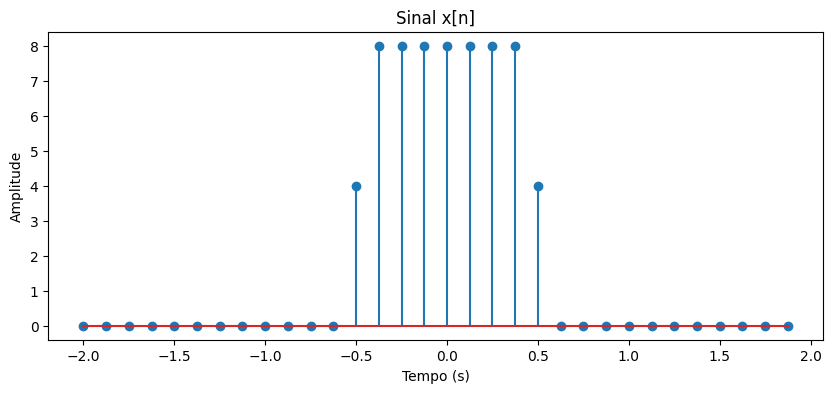

In [103]:
#Resposta da questão 1a


# Parâmetros
f_s = 8  # Taxa de amostragem (Hz)
T0 = 4  # Tempo total para atingir a resolução de frequência (s)
resolution = 0.25  # Resolução na frequência (Hz)
N = int(f_s * T0)  # Número de amostras

# Amostragem do sinal
t, x_samples = sample_signal(x_t, T0, f_s, resolution)

# Plotando o sinal amostrado e sua DFT
plt.figure(figsize=(10, 4))

# Sinal x[n] no tempo

plt.stem(t, x_samples, label='x[n]')
plt.title('Sinal x[n]')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')





## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

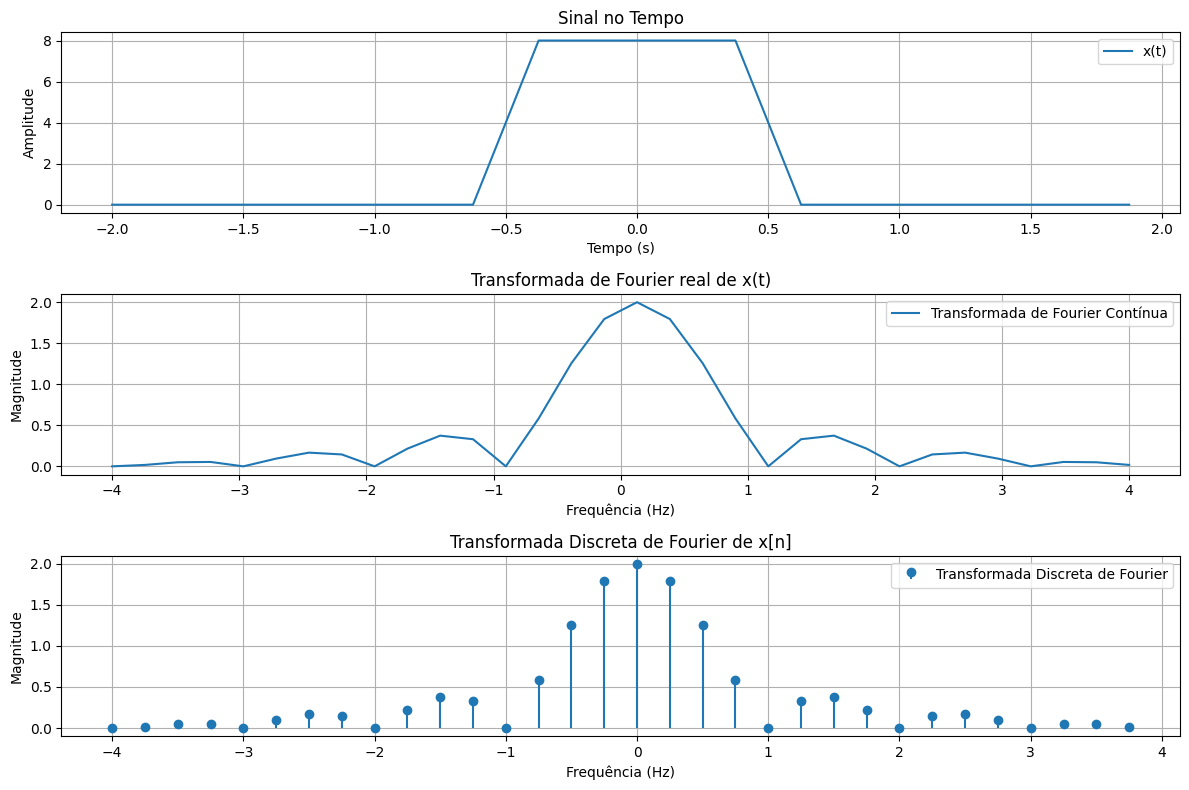

In [104]:

# Frequências para a DFT
f_dft = fftfreq(N, d=1/f_s)
# DFT do sinal amostrado e centragem
X_dft = fft(x_t(t)) / N  

# Definir as frequências para a Transformada de Fourier real de x(t)
f_cont = np.linspace(-f_s/2, f_s/2, N)
X_cont = fftshift(fft(x_t(t)) / N) # Transformada de Fourier contínua analítica de 8 * rect(t)
X_cont = np.real(X_cont)

#Plota o sinal
plt.figure(figsize=(12, 8))

# Sinal no tempo
plt.subplot(3, 1, 1)
plt.plot(t, x_samples, label='x(t)')
plt.title('Sinal no Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Transformada de Fourier real de x(t)
plt.subplot(3, 1, 2)
plt.plot(f_cont, np.abs(X_cont), label='Transformada de Fourier Contínua')
plt.title('Transformada de Fourier real de x(t)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

# Transformada Discreta de Fourier
plt.subplot(3, 1, 3)
plt.stem(f_dft, np.abs(X_dft), basefmt=" ", label='Transformada Discreta de Fourier')
plt.title('Transformada Discreta de Fourier de x[n]')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

In [1]:
#Resposta da questão 2a

x = np.zeros(N)
x[:64] = 1    


# Parâmetros do sinal x[n]
N = 256  


# Parâmetros
f_c = 1 / 16  # Frequência de corte normalizada
f_s = 1
y2a, X2b, f = H1(x,f_c,f_s)


# Plotagem dos sinais
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x)
plt.title('Sinal Original x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.abs(y2a))
plt.title('Sinal Filtrado y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

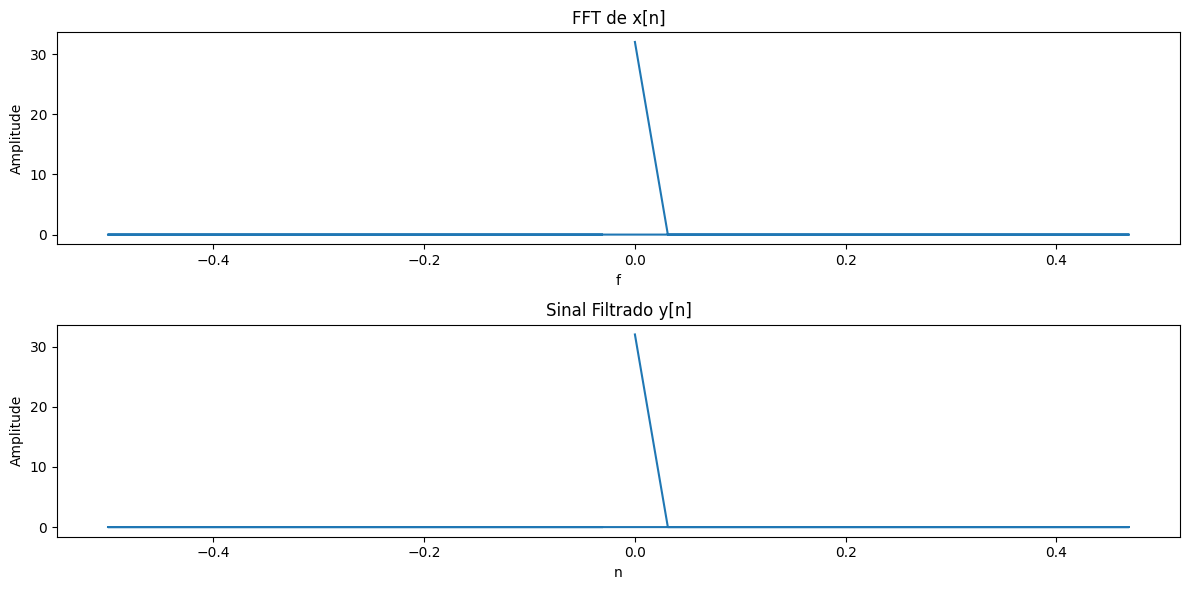

In [106]:
#Resposta da questão 2b

#DFT do sinal y[n]
Y = np.fft.fft(y2a)

# Plotagem dos sinais
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(f, np.abs(X2b))
plt.title('FFT de x[n]')
plt.xlabel('f')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(f, np.abs(Y))
plt.title('Sinal Filtrado y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


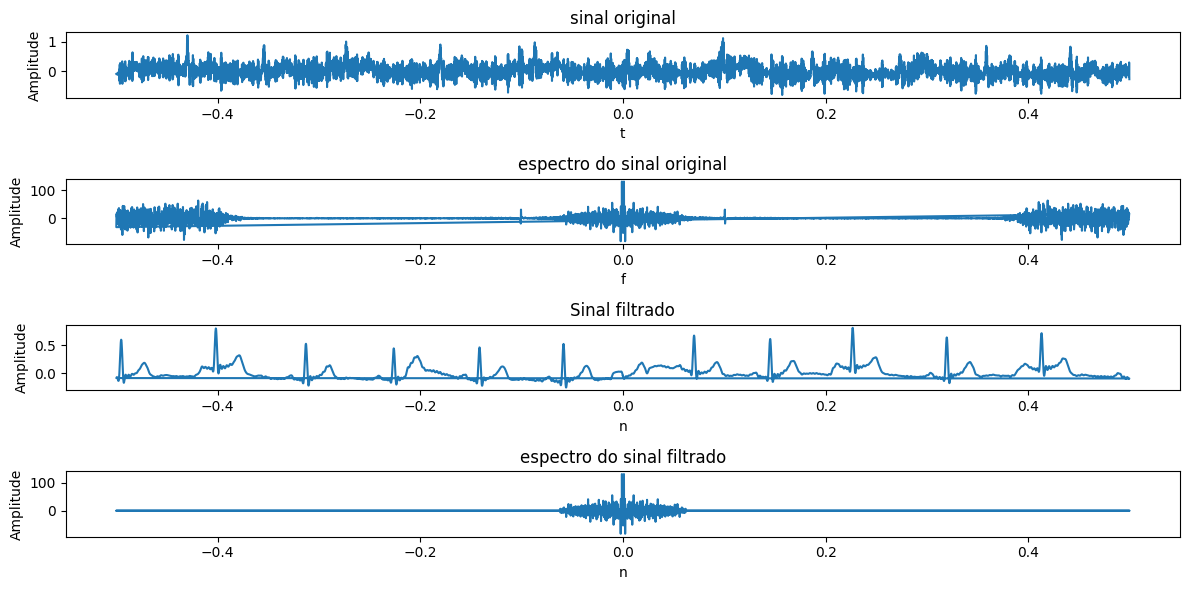

In [107]:
#Resposta da questão 2c

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()
t = np.linspace(-f_s/2, f_s/2, len(sinal), endpoint=False)  # Vetor de tempo amostrado
y2c, X2c, f2c = H1(sinal, f_c, f_s) #sinal filtrado

#DFT do sinal filtrado
Y2c = np.fft.fft(y2c) 

# Plotagem dos sinais
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.plot(t, sinal)
plt.title('sinal original')
plt.xlabel('t')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(f2c, X2c)
plt.title('espectro do sinal original')
plt.xlabel('f')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(f2c, y2c)
plt.title('Sinal filtrado')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(f2c, Y2c)
plt.title('espectro do sinal filtrado')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


Número decodificado: 911


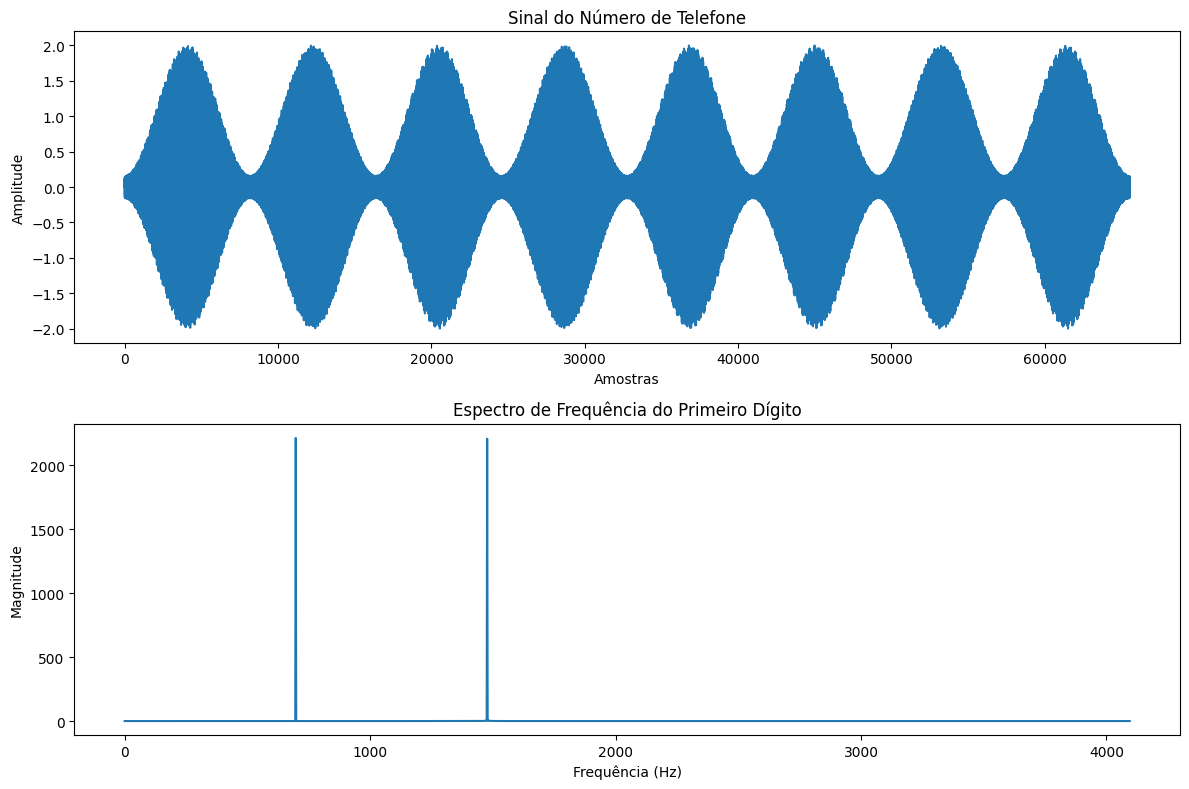

In [108]:
#Resposta da questão 3

sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()


# Mapeamento das teclas
key_map = {
    (697, 1209): '1', (697, 1336): '2', (697, 1477): '3',
    (770, 1209): '4', (770, 1336): '5', (770, 1477): '6',
    (852, 1209): '7', (852, 1336): '8', (852, 1477): '9',
    (941, 1336): '0'}

# Parâmetros do sinal
fs = 8192  # Frequência de amostragem (Hz)
duration = 1  # Duração de cada som (s)


#Filtra o sinal com um passsa faixa de 697Hz a 1477Hz para evitar a influência de ruídos
sinal1_filtrado, fft_sinal2, f1 = passa_faixa(sinal1, 697, 1477, fs)

# Decodificar o número do telefone
decoded_number = decode_signal(sinal2, fs, duration)

print("Número decodificado:", decoded_number)

# Plotagem do sinal e seu espectro
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(sinal1)
plt.title('Sinal do Número de Telefone')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
n_samples = int(fs * duration)
fft_signal = np.abs(fft(sinal1[:n_samples]))
freqs = np.fft.fftfreq(n_samples, 1/fs)
plt.plot(freqs[:n_samples//2], fft_signal[:n_samples//2])
plt.title('Espectro de Frequência do Primeiro Dígito')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

